# Análise de Dados dos Municípios Petro-Rentistas

Este notebook apresenta uma análise dos indicadores IFDM e do programa Bolsa Família nos municípios classificados como petro-rentistas. O objetivo é documentar o fluxo de trabalho e destacar os principais resultados obtidos.

In [14]:
import pandas as pd

df = pd.read_csv('../data/ifdm_and_cadunico_long.csv')

df.head()

,COD_MUNIC,NOME_MUNIC,Ano,IFDM,IFDM_Classificacao,IFDM_Educacao,IFDM_Educacao_Classificacao,IFDM_Saude,IFDM_Saude_Classificacao,IFDM_Renda,IFDM_Renda_Classificacao,Beneficiarios_PBF
0,330010,Angra dos Reis,2013,0.6387,Moderado,0.3745,Crítico,0.6807,Moderado,0.8609,Alto,33995.000000
1,330010,Angra dos Reis,2014,0.6531,Moderado,0.3917,Crítico,0.6891,Moderado,0.8785,Alto,35754.416667
2,330010,Angra dos Reis,2015,0.6385,Moderado,0.4004,Baixo,0.6887,Moderado,0.8264,Alto,35485.166667
3,330010,Angra dos Reis,2016,0.5974,Baixo,0.3630,Crítico,0.6716,Moderado,0.7575,Moderado,35760.250000
4,330010,Angra dos Reis,2017,0.5897,Baixo,0.3862,Crítico,0.6629,Moderado,0.7201,Moderado,31065.083333


Selecionar Municipios petro rentista

In [15]:
# Dados extraídos da imagem
data = [
    ['Norte Fluminense', 'Campos dos Goytacazes', 'ZPP BC'],
    ['Norte Fluminense', 'Macaé', 'ZPP BC'],
    ['Baixada Litorânea', 'Cabo Frio', 'ZPP BC'],
    ['Baixada Litorânea', 'Rio das Ostras', 'ZPP BC'],
    ['Baixada Litorânea', 'Casimiro de Abreu', 'ZPP BC'],
    ['Baixada Litorânea', 'Armação de Búzios', 'ZPP BC'],
    ['Norte Fluminense', 'São João da Barra', 'ZPP BC'],
    ['Norte Fluminense', 'Quissamã', 'ZPP BC'],
    ['Norte Fluminense', 'Carapebus', 'ZPP BC'],
    ['Metropolitana', 'Rio de Janeiro-RJ', 'ZPP BS'],
    ['Metropolitana', 'Duque de Caxias-RJ', 'ZPP BS'],
    ['Metropolitana', 'Niteroi-RJ', 'ZPP BS'],
    ['Metropolitana', 'Itaborai-RJ', 'ZPP BS'],
    ['Metropolitana', 'Marica-RJ', 'ZPP BS'],
    ['Costa Verde', 'Angra dos Reis-RJ', 'ZPP BS'],
    ['Baixada Litorânea', 'Araruama-RJ', 'ZPP BS'],
    ['Metropolitana', 'Itaguai-RJ', 'ZPP BS'],
    ['Baixada Litorânea', 'Saquarema-RJ', 'ZPP BS'],
    ['Costa Verde', 'Parati-RJ', 'ZPP BS'],
    ['Costa Verde', 'Mangaratiba-RJ', 'ZPP BS'],
    ['Baixada Litorânea', 'Arraial do Cabo-RJ', 'ZPP BS']
]

df_zpp = pd.DataFrame(data, columns=['Região', 'Município', 'ZPP'])

# Tabela de correspondência com códigos IBGE
cod_ibge = {
    'Campos dos Goytacazes': 330100,
    'Macaé': 330240,
    'Cabo Frio': 330070,
    'Rio das Ostras': 330452,
    'Casimiro de Abreu': 330130,
    'Armação de Búzios': 330022,
    'São João da Barra': 330500,
    'Quissamã': 330470,
    'Carapebus': 330093,
    'Rio de Janeiro-RJ': 330455,
    'Duque de Caxias-RJ': 330170,
    'Niteroi-RJ': 330330,
    'Itaborai-RJ': 330190,
    'Marica-RJ': 330270,
    'Angra dos Reis-RJ': 330010,
    'Araruama-RJ': 330020,
    'Itaguai-RJ': 330200,
    'Saquarema-RJ': 330550,
    'Parati-RJ': 330380,
    'Mangaratiba-RJ': 330260,
    'Arraial do Cabo-RJ': 330025
}

# Adicionando coluna com código IBGE
df_zpp["Código IBGE"] = df_zpp["Município"].map(cod_ibge)



In [16]:
df_petro = df[df.COD_MUNIC.isin(df_zpp['Código IBGE'])]

Complementar com informacao das regioes e Zona

In [17]:
df_petro = df_petro.merge(
    df_zpp, left_on='COD_MUNIC', right_on='Código IBGE', how='left'
)

df_petro.drop(columns=['Código IBGE', 'Município'], inplace=True)

Alterar posicao das colunas

In [18]:
df_petro.insert(2, 'ZPP', df_petro.pop('ZPP'))
df_petro.insert(3, 'Região', df_petro.pop('Região'))

In [19]:
df_petro.head()

,COD_MUNIC,NOME_MUNIC,ZPP,Região,Ano,IFDM,IFDM_Classificacao,IFDM_Educacao,IFDM_Educacao_Classificacao,IFDM_Saude,IFDM_Saude_Classificacao,IFDM_Renda,IFDM_Renda_Classificacao,Beneficiarios_PBF
0,330010,Angra dos Reis,ZPP BS,Costa Verde,2013,0.6387,Moderado,0.3745,Crítico,0.6807,Moderado,0.8609,Alto,33995.000000
1,330010,Angra dos Reis,ZPP BS,Costa Verde,2014,0.6531,Moderado,0.3917,Crítico,0.6891,Moderado,0.8785,Alto,35754.416667
2,330010,Angra dos Reis,ZPP BS,Costa Verde,2015,0.6385,Moderado,0.4004,Baixo,0.6887,Moderado,0.8264,Alto,35485.166667
3,330010,Angra dos Reis,ZPP BS,Costa Verde,2016,0.5974,Baixo,0.3630,Crítico,0.6716,Moderado,0.7575,Moderado,35760.250000
4,330010,Angra dos Reis,ZPP BS,Costa Verde,2017,0.5897,Baixo,0.3862,Crítico,0.6629,Moderado,0.7201,Moderado,31065.083333


# Analise de dados

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.pyplot as plt

def create_additional_subplot(ax):
    # Criar um subplot adicional abaixo do gráfico atual
    divider = make_axes_locatable(ax)
    ax_sub = divider.append_axes("bottom", size="35%", pad=0.2)
    return ax_sub

def plot_margin(title, ax, color='#1F4E79'):
    ax_sub = create_additional_subplot(ax)
    
    # Mostrar rótulo a cada 1 ano
    distinc_year = sorted(df_petro["Ano"].astype(str).unique().tolist())
    labels_show = [ano if i % 2 == 0 else '' for i, ano in enumerate(distinc_year)]

    df_filtered = df_petro.query("NOME_MUNIC == @title")

    sns.barplot(
        x=df_filtered["Ano"],
        y=df_filtered["Beneficiarios_PBF"],
        ax=ax_sub,
        color=color,
        edgecolor='black',
        linewidth=0.6,  
        label="PBF (n)", 
        legend=False
    )

    # O ano tem que ser str 
    ax_sub.set_xticks(distinc_year)
    ax_sub.set_xticklabels(labels_show)
    ax_sub.set_xlabel("Ano")
    ax_sub.set_ylabel("PBF (n)")

    ax_sub.tick_params(axis='x', rotation=45, bottom=False )
    ax_sub.tick_params(axis="y")

    ax_sub.set_xlim(ax.get_xlim())

def add_ifdm_bands(ax, colors):
    # Adicionar regiões sombreadas para a classificação do IFDM
    ax.axhline(0.4, color=colors['Crítico'], linestyle='--', linewidth=1)
    ax.axhline(0.6, color=colors['Baixo'], linestyle='--', linewidth=1)
    ax.axhline(0.8, color=colors['Alto'], linestyle='--', linewidth=1)

    # Ponto médio do eixo x para centralizar os textos
    x_pos = ax.get_xticks()[-1] + 0.2

    # Adiciona rótulos das faixas no meio do eixo x
    ax.text(x_pos, 0.35, 'Crítico', color="#818181", fontsize=9, ha='left', va='center')
    ax.text(x_pos, 0.5, 'Baixo', color='#818181', fontsize=9, ha='left', va='center')
    ax.text(x_pos, 0.7, 'Moderado', color='#818181', fontsize=9, ha='left', va='center')
    ax.text(x_pos, 0.85, 'Alto', color='#818181', fontsize=9, ha='left', va='center')


In [21]:
plt.rcParams.update({
    'font.family': 'DejaVu Sans',     # Ou use 'Lato', 'Open Sans' se instaladas no sistema
    'font.size': 11,                  # Tamanho padrão para o corpo
    'axes.titlesize': 12,            # Tamanho para títulos dos subplots
    'axes.labelsize': 11,            # Tamanho dos rótulos dos eixos
    'axes.labelcolor': '#2E2E2E',     # Cor elegante para texto dos eixos
    'xtick.color': '#666666',         # Cor dos valores no eixo x
    'ytick.color': '#666666',         # Cor dos valores no eixo y
    'text.color': '#2E2E2E',          # Cor padrão para textos
    'legend.fontsize': 11,             # Tamanho da legenda
})

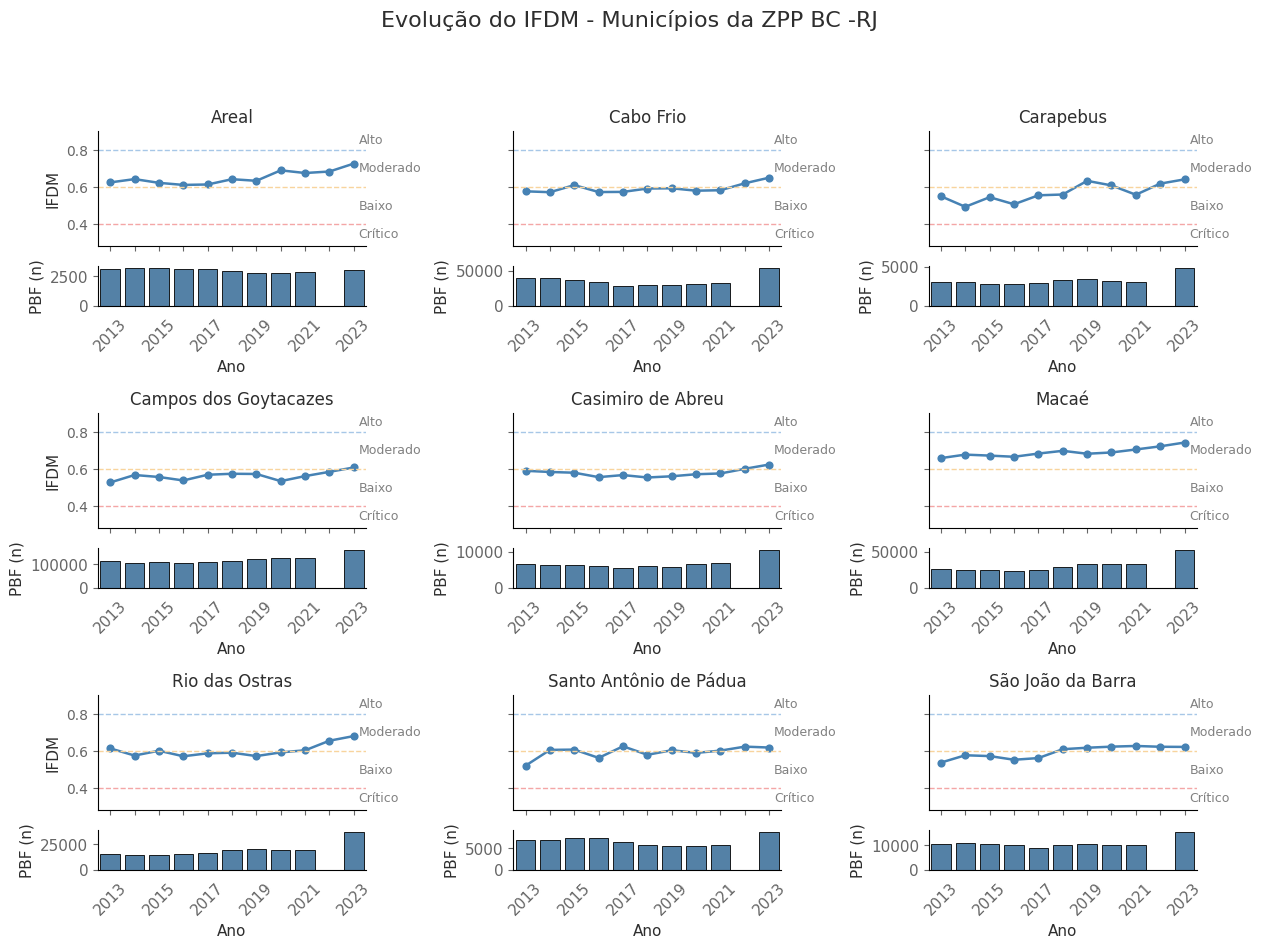

In [22]:
color_chart = 'steelblue'  # Azul elegante

# Criação do gráfico
g = sns.catplot(
    data=df_petro.query("ZPP == 'ZPP BC'"),
    x='Ano',
    y='IFDM',
    col='NOME_MUNIC',
    kind='point',
    col_wrap=3,
    height=3,
    aspect=1.4,
    color=color_chart,
    linestyles='-',
    markers='o',
    linewidth=1.8,
    sharex=False
)

# Definir as cores para as faixas de classificação
colors = {
    'Crítico': '#F4A6A6',     # vermelho suave
    'Baixo':   '#F8D49D',     # laranja claro
    'Moderado':'#D7EAC4',     # verde suave
    'Alto':    '#A7C7E7'      # azul claro elegante
}

# Título geral
g.figure.suptitle('Evolução do IFDM - Municípios da ZPP BC -RJ', fontsize=16, y=1.05)

# Ajuste dos rótulos do eixo x
for ax in g.axes.flatten():
    title=ax.get_title().split(' = ')[-1]  
    ax.set_title(title) 
    ax.set_xlabel('')
    ax.set_ylabel('IFDM')
    ax.set_ylim(df_petro['IFDM'].min() - 0.2, 0.9)
    # Rótulos do eixo X do subplot principal
    ax.tick_params(axis="x", labelbottom=False)
    ax.tick_params(axis="y", labelsize=10)

    # Adicionar Faixas
    add_ifdm_bands(ax, colors)
    # Adicionar subplot adicional com PBF
    plot_margin(title, ax, color_chart)
    
# Remove bordas superiores e direitas
sns.despine()

# Ajuste de layout
plt.tight_layout()
plt.show()

g.savefig('ifdm_global.svg', dpi=300, bbox_inches='tight')


IFDM decomposto 

In [23]:
df_long = df_petro.melt(
    id_vars=['Ano', 'NOME_MUNIC', 'ZPP'],
    value_vars=['IFDM', 'IFDM_Educacao', 'IFDM_Saude', 'IFDM_Renda'], # Suas colunas para o eixo Y
    var_name='Métrica', # Nome da nova coluna que indica qual métrica é (IFDM, Outra_Métrica)
    value_name='Valor' # Nome da nova coluna que contém os valores
)

df_long.Métrica = df_long.Métrica.replace({'IFDM_Educacao':'Educação', 'IFDM_Renda':'Emprego & Renda', 'IFDM_Saude':'Saúde'})

df_long.tail()

,Ano,NOME_MUNIC,ZPP,Métrica,Valor
919,2019,Saquarema,ZPP BS,Emprego & Renda,0.6014
920,2020,Saquarema,ZPP BS,Emprego & Renda,0.5895
921,2021,Saquarema,ZPP BS,Emprego & Renda,0.6359
922,2022,Saquarema,ZPP BS,Emprego & Renda,0.6499
923,2023,Saquarema,ZPP BS,Emprego & Renda,0.6944


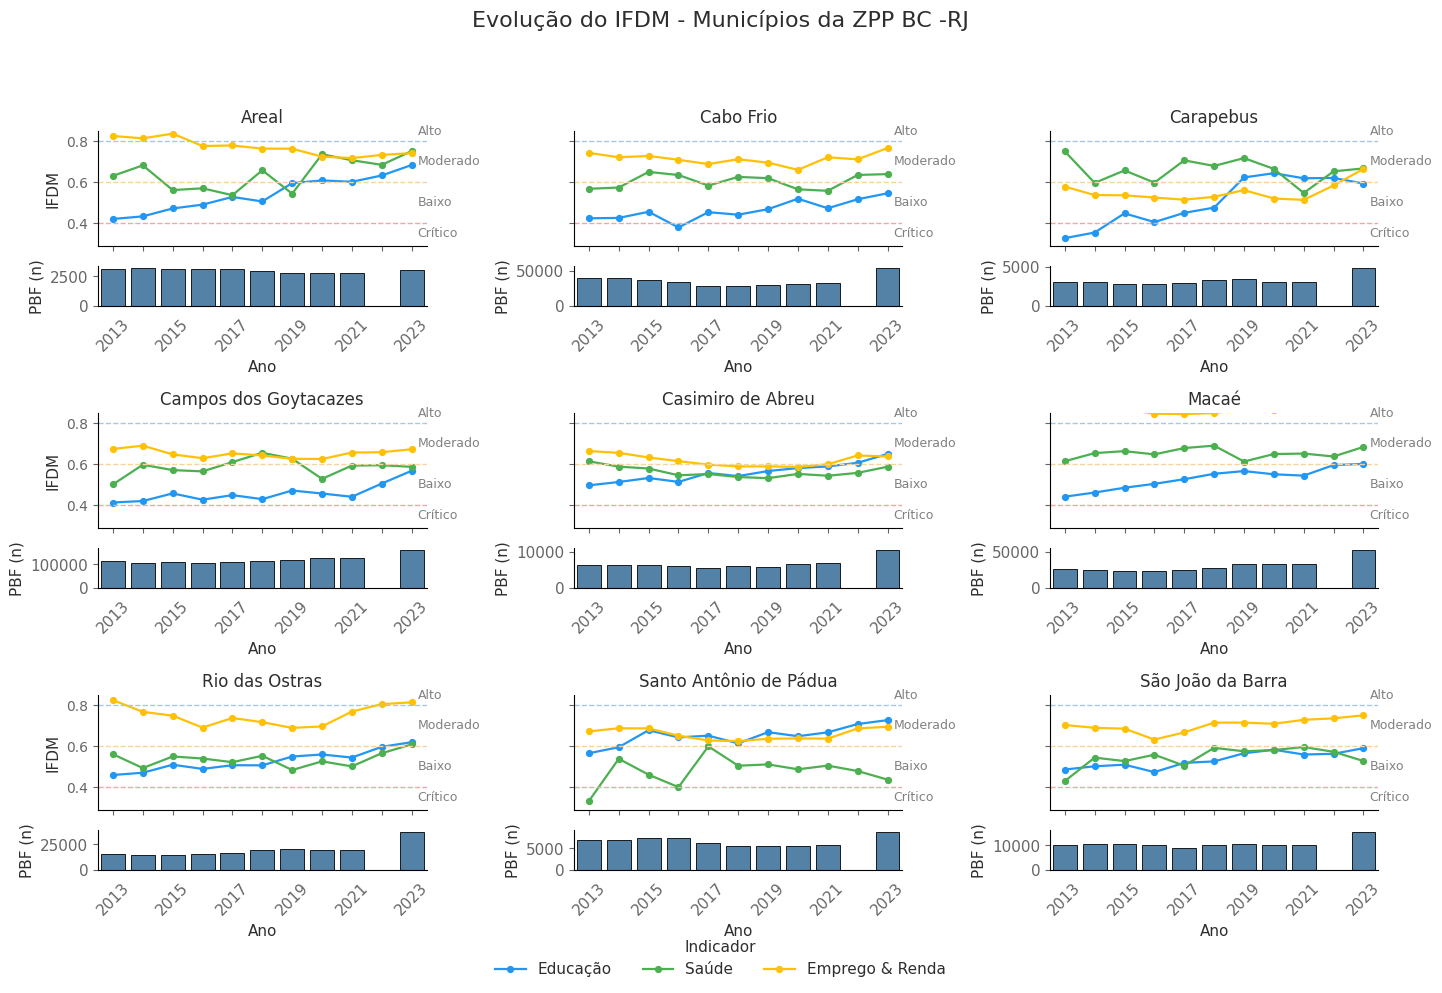

In [24]:
color_chart = 'steelblue'  # Azul elegante

# Paleta de cores personalizada
custom_palette = {
    'Educação': '#1f77b4',   # azul petróleo
    'Saúde': '#2ca02c',      # verde oliva claro
    'Emprego & Renda': '#ff7f0e'       # laranja queimado
}

custom_palette = {
    'Educação': '#2196F3',
    'Emprego & Renda': '#FFC107',
    'Saúde': '#4CAF50'
}

# Criação do gráfico
g = sns.catplot(
    data=df_long.query("ZPP == 'ZPP BC' & Métrica != 'IFDM'"),
    x='Ano',
    y='Valor',
    col='NOME_MUNIC',
    kind='point',
    col_wrap=3,
    height=3,
    aspect=1.4,
    hue='Métrica',
    palette=custom_palette,
    linestyles='-',
    markers='o',
    linewidth=1.6,
    sharex=False,
)

# Definir as cores para as faixas de classificação
colors = {
    'Crítico': '#F4A6A6',     # vermelho suave
    'Baixo':   '#F8D49D',     # laranja claro
    'Moderado':'#D7EAC4',     # verde suave
    'Alto':    '#A7C7E7'      # azul claro elegante
}

# Título geral
g.figure.suptitle('Evolução do IFDM - Municípios da ZPP BC -RJ', fontsize=16, y=1.05)

# Remove legenda padrão do Seaborn
g._legend.remove()

# Adiciona nova legenda horizontal fora da área dos gráficos
g.figure.legend(
    title='Indicador',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.04),  # ⬅ centraliza abaixo
    ncol=3,             # ⬅ uma linha com todos os itens
    frameon=False
)

# Ajuste dos rótulos do eixo x
for ax in g.axes.flatten():
    title=ax.get_title().split(' = ')[-1]  
    ax.set_title(title) 
    ax.set_xlabel('')
    ax.set_ylabel('IFDM')
    ax.set_ylim(df_petro['IFDM'].min() - 0.2, 0.85)
    # Rótulos do eixo X do subplot principal
    ax.tick_params(axis="x", labelbottom=False)
    ax.tick_params(axis="y", labelsize=10)

    # Adicionar Faixas
    add_ifdm_bands(ax, colors)
    # Adicionar subplot adicional com PBF
    plot_margin(title, ax, color_chart)
    
# Remove bordas superiores e direitas
sns.despine()

# Ajuste de layout
plt.tight_layout()
plt.show()  

g.savefig('ifdm_decomposto.svg', dpi=300, bbox_inches='tight')

Tabelas

In [25]:
df_petro

,COD_MUNIC,NOME_MUNIC,ZPP,Região,Ano,IFDM,IFDM_Classificacao,IFDM_Educacao,IFDM_Educacao_Classificacao,IFDM_Saude,IFDM_Saude_Classificacao,IFDM_Renda,IFDM_Renda_Classificacao,Beneficiarios_PBF
0,330010,Angra dos Reis,ZPP BS,Costa Verde,2013,0.6387,Moderado,0.3745,Crítico,0.6807,Moderado,0.8609,Alto,33995.000000
1,330010,Angra dos Reis,ZPP BS,Costa Verde,2014,0.6531,Moderado,0.3917,Crítico,0.6891,Moderado,0.8785,Alto,35754.416667
2,330010,Angra dos Reis,ZPP BS,Costa Verde,2015,0.6385,Moderado,0.4004,Baixo,0.6887,Moderado,0.8264,Alto,35485.166667
3,330010,Angra dos Reis,ZPP BS,Costa Verde,2016,0.5974,Baixo,0.3630,Crítico,0.6716,Moderado,0.7575,Moderado,35760.250000
4,330010,Angra dos Reis,ZPP BS,Costa Verde,2017,0.5897,Baixo,0.3862,Crítico,0.6629,Moderado,0.7201,Moderado,31065.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,330550,Saquarema,ZPP BS,Baixada Litorânea,2019,0.5554,Baixo,0.5644,Baixo,0.5003,Baixo,0.6014,Moderado,11789.500000
227,330550,Saquarema,ZPP BS,Baixada Litorânea,2020,0.5424,Baixo,0.5541,Baixo,0.4837,Baixo,0.5895,Baixo,12372.416667
228,330550,Saquarema,ZPP BS,Baixada Litorânea,2021,0.5964,Baixo,0.5589,Baixo,0.5945,Baixo,0.6359,Moderado,13321.800000
229,330550,Saquarema,ZPP BS,Baixada Litorânea,2022,0.6183,Moderado,0.6165,Moderado,0.5884,Baixo,0.6499,Moderado,NaN
